In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install teeplot
from teeplot import teeplot as tp


# OSF identifier
data_id = "v3ec9"

# load CSV file into DataFrame directly from OSF URL
df = pd.read_csv(f"https://osf.io/{data_id}/download")


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


teeplots/viz=plot-mean-real-execution-time+ext=.pdf
teeplots/viz=plot-mean-real-execution-time+ext=.png


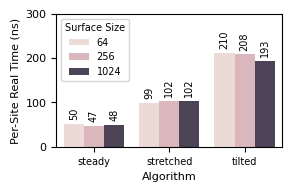

In [2]:
def plot_mean_real_execution_time(data):
    df["algorithm"] = df["Algorithm"].replace({
        "steady_lookup_ingest_times_batched": "steady",
        "stretched_lookup_ingest_times_batched": "stretched",
        "tilted_lookup_ingest_times_batched": "tilted",
    })

    # assign S and Tsize directly
    df["S"] = df["Surface Size (S)"]
    df["Tsize"] = df["T Size"]

    # convert to microseconds per site
    df["Real Time Per Site (ns)"] = (df["Real Execution Time"] * 1e9) / (df["S"] * df["Tsize"])

    # group by algorithm, S and compute mean per-site time
    grouped = df.groupby(["algorithm", "S"], as_index=False)["Real Time Per Site (ns)"].mean()

    # bar plot
    plt.figure(figsize=(3, 2))  # these are IRL dimensions

    # more bar plot
    ax = sns.barplot(data=grouped, x="algorithm", y="Real Time Per Site (ns)", hue="S", alpha=0.85)

    # add labels to the bars
    for container in ax.containers:
        labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, fmt='%d', fontsize=7, padding=3, rotation=90)  # Rotate only bar labels

    # better readability
    plt.xlabel("Algorithm", fontsize=8)
    plt.ylabel("Per-Site Real Time (ns)", fontsize=8)

    # keep x-axis labels horizontal
    plt.xticks(fontsize=7, rotation=0)

    plt.yticks(fontsize=8)

    # ylim
    ax.set_ylim(0, 300)

    # legend
    plt.legend(title="Surface Size", title_fontsize=7, fontsize=7, loc="upper left")

    # layout adjustment
    plt.subplots_adjust(bottom=0.4)
    plt.tight_layout(pad=1)


# teeplot
tp.tee(plot_mean_real_execution_time, data=df)
